# Implementation of ANN using Keras:

In [1]:
# Importing Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [82]:
# Checking version of Tensorflow ans Keras
print(f"Tensorflow Version {tf.__version__}")
print(f"Keras Version {tf.keras.__version__}")

Tensorflow Version 2.18.0
Keras Version 3.8.0


# GPU / CPU Check

In [83]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [84]:
tf.config.list_physical_devices("CPU")

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [85]:
check_list = ['GPU','CPU']

for device in check_list:
  out = tf.config.list_physical_devices(device)
  if len(out) > 0:
    print(f"{device} is available!")
    print(f"Details >> {out}")
  else:
    print(f"{device} isn't available!")

GPU is available!
Details >> [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
CPU is available!
Details >> [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


# Creating a simple classifier using keras on MNIST data

In [86]:
mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

In [87]:
print(f"data type of X_train_full: {X_train_full.dtype},\n shape of X_train_full: {X_train_full.shape}")

data type of X_train_full: uint8,
 shape of X_train_full: (60000, 28, 28)


In [88]:
X_test.shape # 28 , 28 is a image size

(10000, 28, 28)

In [89]:
len(X_test[1][0])

28

In [90]:
# create a validation data set from the full training data
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:] # 1st 5000 records for y_valid and next 5000 to 60000 records for y_train

# scale the test set as well
X_test = X_test / 255.


In [91]:
len(X_train_full[5000:] )

55000

In [92]:
#Now we have
#TRAIN- 55000
#Test - 10000
#Val - 5000

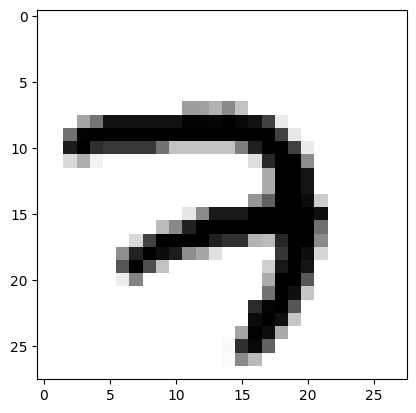

In [93]:
# Lets view some data
plt.imshow(X_train[0], cmap="binary")
plt.show()

In [94]:
# its a 3

<Axes: >

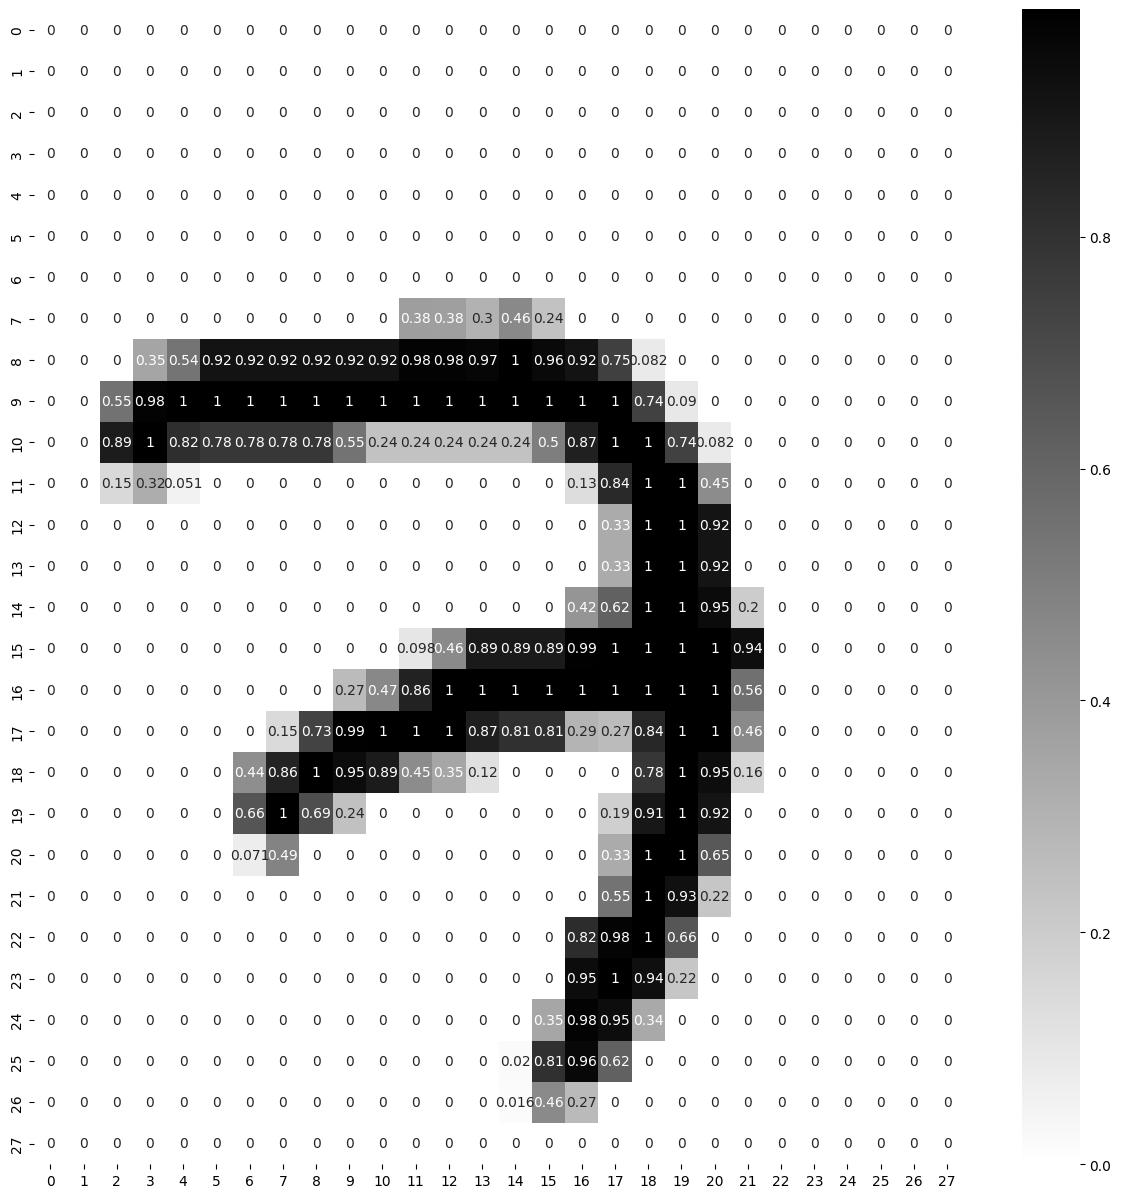

In [95]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot=True, cmap="binary")
# it is 28 by 28 matrix

# Architecture Used:
<img src="https://github.com/entbappy/Branching-tutorial/blob/master/9.png?raw=true"
width="500"
height="300">

In [96]:
# 1st Hidden layer we have 300 neurons we will use Relu Activation fn
# 2st Hidden layer we have 100 neurons we will use Relu Activation fn
# Output layer we will use SOFTMAX with 10 neurons

In [97]:
28*28 # inputs

784

In [98]:
# we have 10 outputs - {0,1,2,3,4,5,6,7,8,9}

In [99]:
# Manual methord of Creating layers of ANN
LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model_clf = tf.keras.models.Sequential(LAYERS)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [100]:
# Method -2 Directly using keras API
#from keras.models import Sequential
#from keras.layers import Dense

#define the model
#model = Sequential()
#model.add(Dense(300, activation="relu", input_shape=(28*28,)))
#model.add(Dense(100, activation="relu"))
#model.add(Dense(10, activation="softmax"))



In [101]:
model_clf.layers

[<Flatten name=inputLayer, built=True>,
 <Dense name=hiddenLayer1, built=True>,
 <Dense name=hiddenLayer2, built=True>,
 <Dense name=outputLayer, built=True>]

In [102]:
model_clf.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inputLayer (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hiddenLayer1 (Dense)            │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hiddenLayer2 (Dense)            │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputLayer (Dense)             │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [103]:
# first Layer * second Layer + bias
784*300 + 300, 300*100+100, 100*10+10

(235500, 30100, 1010)

In [104]:
# Total parameters to be trained
sum((235500, 30100, 1010))

266610

In [105]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [106]:
len(hidden1.get_weights()[1])

300

In [107]:
hidden1.get_weights()

[array([[-0.04550081, -0.03449567, -0.02644776, ...,  0.05224131,
         -0.02983436,  0.02274032],
        [ 0.06745777, -0.00727933, -0.02601804, ...,  0.07350898,
         -0.01344598, -0.00169281],
        [ 0.00051796, -0.03943306,  0.01711689, ...,  0.07417761,
         -0.06104413,  0.04639279],
        ...,
        [ 0.00780682, -0.05828778, -0.03716401, ..., -0.05484479,
         -0.01309318, -0.0209302 ],
        [-0.0108437 , -0.01222003,  0.03639919, ...,  0.00178549,
         -0.05904751, -0.03059727],
        [-0.06423049, -0.00539175, -0.02980836, ...,  0.06934935,
          0.04269157, -0.05979881]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [108]:
hidden1.get_weights()[0].shape, #for every neuron 300 weights


((784, 300),)

In [109]:
hidden1.get_weights()[1].shape#Bayes

(300,)

In [110]:
weights, biases = hidden1.get_weights()

In [111]:
print("shape\n",weights.shape, "\n")
weights

shape
 (784, 300) 



array([[-0.04550081, -0.03449567, -0.02644776, ...,  0.05224131,
        -0.02983436,  0.02274032],
       [ 0.06745777, -0.00727933, -0.02601804, ...,  0.07350898,
        -0.01344598, -0.00169281],
       [ 0.00051796, -0.03943306,  0.01711689, ...,  0.07417761,
        -0.06104413,  0.04639279],
       ...,
       [ 0.00780682, -0.05828778, -0.03716401, ..., -0.05484479,
        -0.01309318, -0.0209302 ],
       [-0.0108437 , -0.01222003,  0.03639919, ...,  0.00178549,
        -0.05904751, -0.03059727],
       [-0.06423049, -0.00539175, -0.02980836, ...,  0.06934935,
         0.04269157, -0.05979881]], dtype=float32)

In [112]:
print("shape\n", biases.shape)

shape
 (300,)


In [113]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)


In [114]:
# training

EPOCHS = 30
VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET, batch_size=32)


Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7333 - loss: 1.0094 - val_accuracy: 0.9168 - val_loss: 0.3046
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9123 - loss: 0.3072 - val_accuracy: 0.9340 - val_loss: 0.2408
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9289 - loss: 0.2441 - val_accuracy: 0.9452 - val_loss: 0.2043
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9397 - loss: 0.2104 - val_accuracy: 0.9516 - val_loss: 0.1777
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9476 - loss: 0.1810 - val_accuracy: 0.9528 - val_loss: 0.1616
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9556 - loss: 0.1585 - val_accuracy: 0.9588 - val_loss: 0.1469
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9586 - loss: 0.1432 - val_accuracy: 0.9634 - val_loss: 0.1341
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9626 - loss: 0.1277 - 

In [115]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [116]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.842527,0.604299,0.9168,0.304606
1,0.916691,0.289074,0.9340,0.240789
2,0.931655,0.236814,0.9452,0.204284
3,0.942036,0.202000,0.9516,0.177711
4,0.948982,0.176539,0.9528,0.161616
5,0.955127,0.156922,0.9588,0.146918
6,0.958927,0.140950,0.9634,0.134077
7,0.963527,0.127036,0.9640,0.128385
8,0.966891,0.115782,0.9664,0.117805
9,0.969818,0.105513,0.9684,0.111994


<Axes: >

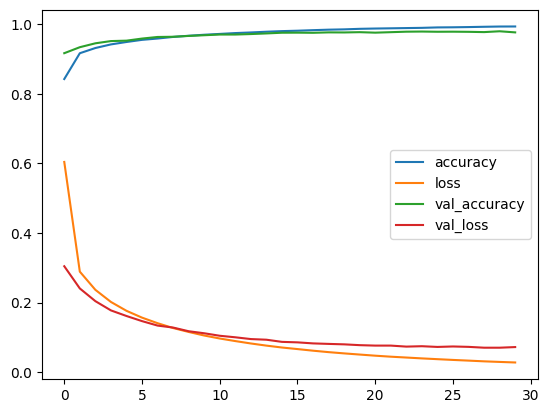

In [117]:
pd.DataFrame(history.history).plot()

In [118]:
model_clf.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9721 - loss: 0.0874


[0.07315560430288315, 0.9763000011444092]

#SAMPLE CHECK- TEST DATA

In [119]:
x_new = X_test[:3]
x_new

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [120]:
actual = y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

<Axes: >

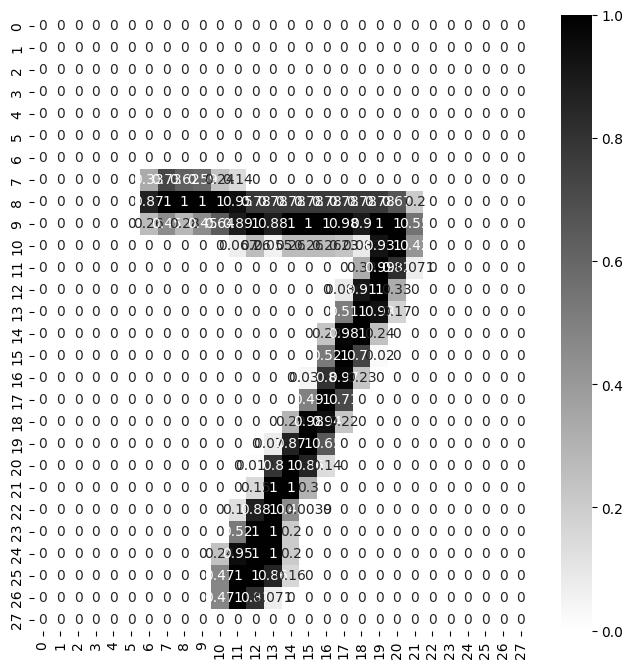

In [121]:
plt.figure(figsize =(8,8))
sns.heatmap(X_test[0], annot=True, cmap="binary")

<Axes: >

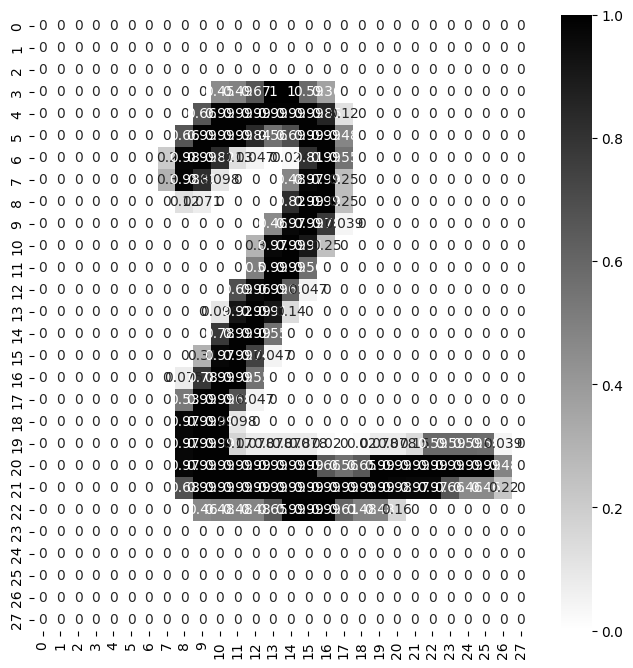

In [122]:
plt.figure(figsize =(8,8))
sns.heatmap(X_test[1], annot=True, cmap="binary")

<Axes: >

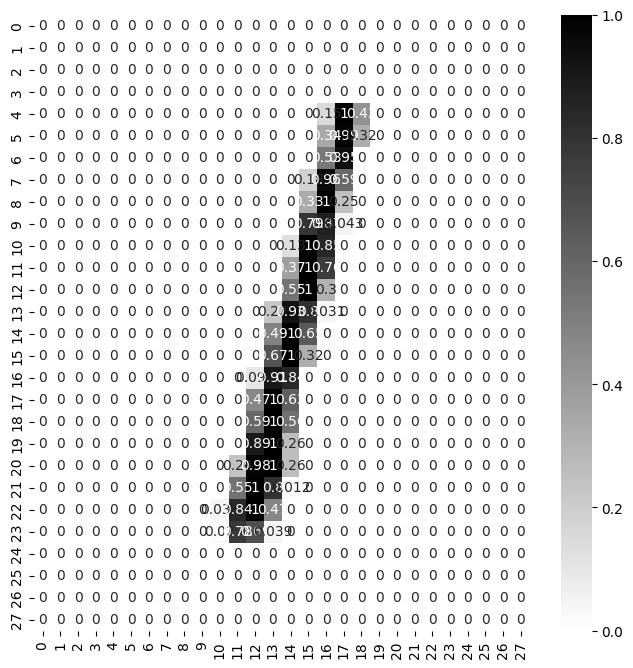

In [123]:
plt.figure(figsize =(8,8))
sns.heatmap(X_test[2], annot=True, cmap="binary")

In [124]:
y_prob = model_clf.predict(x_new)
y_prob.round(3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


array([[0.   , 0.   , 0.   , 0.001, 0.   , 0.   , 0.   , 0.999, 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.998, 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.001,
        0.   ]], dtype=float32)

In [125]:
y_prob

array([[4.35886523e-06, 2.44820171e-07, 9.69510584e-05, 8.91268195e-04,
        6.49845378e-09, 2.35465404e-06, 4.23000190e-10, 9.98995483e-01,
        3.83928955e-06, 5.47584159e-06],
       [3.99932070e-08, 2.85618426e-05, 9.99947667e-01, 2.22446652e-05,
        1.18694320e-13, 1.84768410e-07, 3.15267698e-07, 1.02122902e-11,
        8.63866887e-07, 1.17209836e-11],
       [4.81813595e-06, 9.97864664e-01, 2.51758029e-04, 2.37185013e-05,
        1.03798011e-04, 3.48180474e-05, 2.78130319e-05, 5.60318003e-04,
        1.09501893e-03, 3.32491945e-05]], dtype=float32)

In [126]:
y_pred = np.argmax(y_prob, axis = -1)

In [127]:
y_pred

array([7, 2, 1])

In [128]:
actual

array([7, 2, 1], dtype=uint8)

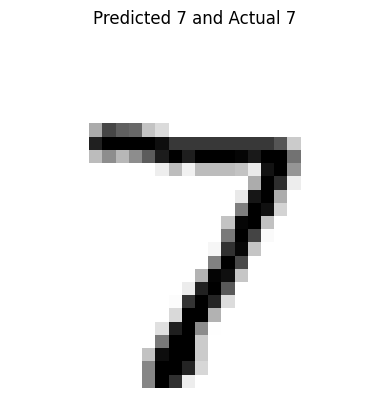

######################


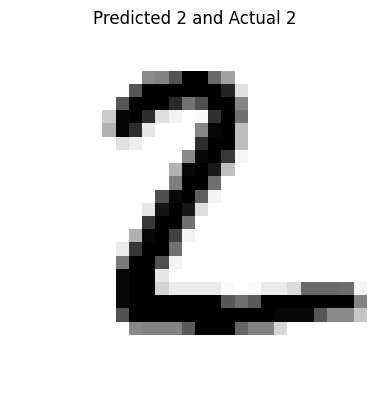

######################


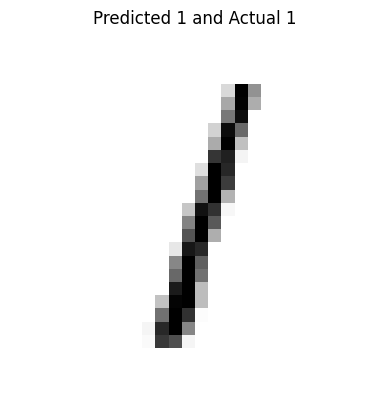

######################


In [129]:
# plot
for data, pred, actual_data in zip(x_new, y_pred, actual):
  plt.imshow(data, cmap="binary")
  plt.title(f"Predicted {pred} and Actual {actual_data}")
  plt.axis("off")
  plt.show()
  print("######################")